## 1. Import data

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(folder, filename)
            try:
                img = Image.open(img_path).convert('L')
                img = img.resize((64, 64))
                img_array = np.array(img)
                images.append(img_array)
            except Exception as e:
                print(f"Warning: Unable to process file '{filename}'. Error: {str(e)}")
                continue
    
    return np.array(images)
X_train = load_images_from_folder('samples')
print(f"Training data shape: {X_train.shape}")


Training data shape: (1070, 64, 64)


In [2]:
# Reshape the data
X_train = X_train.reshape(len(X_train), 64 * 64)
print(f"Training data shape: {X_train.shape}")

Training data shape: (1070, 4096)


# show data

In [3]:
import pandas as pd

# Create a list of column names
column_names = ['label'] + [f'pixel {i+1}' for i in range(X_train.shape[1])]

df_train = pd.DataFrame(X_train, columns=column_names[1:])

print(f"DataFrame shape: {df_train.shape}") 
print(df_train.head())  

DataFrame shape: (1070, 4096)
   pixel 1  pixel 2  pixel 3  pixel 4  pixel 5  pixel 6  pixel 7  pixel 8  \
0      192      193      194      194      199      167       23      169   
1      192      193      194      194      196      196      197      198   
2      192      193      194      195      198      173       16        2   
3      192      193      194      194      196      196      197      198   
4      192      193      194      194      196      196      197      198   

   pixel 9  pixel 10  ...  pixel 4087  pixel 4088  pixel 4089  pixel 4090  \
0      206       200  ...         245         247         247         248   
1      199       201  ...         245         247         247         248   
2      134       211  ...         245         247         247         248   
3      199       201  ...         245         247         247         248   
4      199       201  ...         245         247         247         248   

   pixel 4091  pixel 4092  pixel 4093  pixel

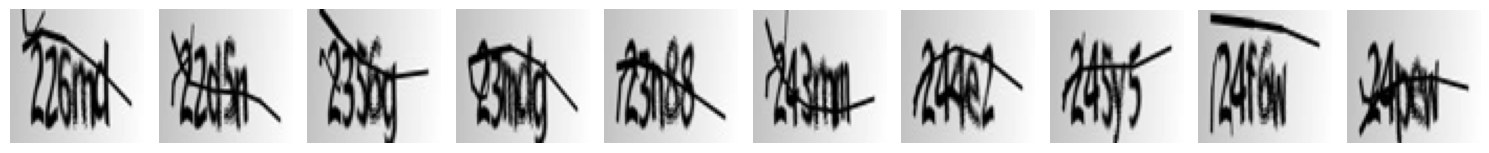

In [4]:
def plot_samples(X, n=10):
    plt.figure(figsize=(15, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        img = X[i].reshape(64, 64)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_samples(X_train, n=10)

## 2. Analyze Variance Ratio and choose the number of components

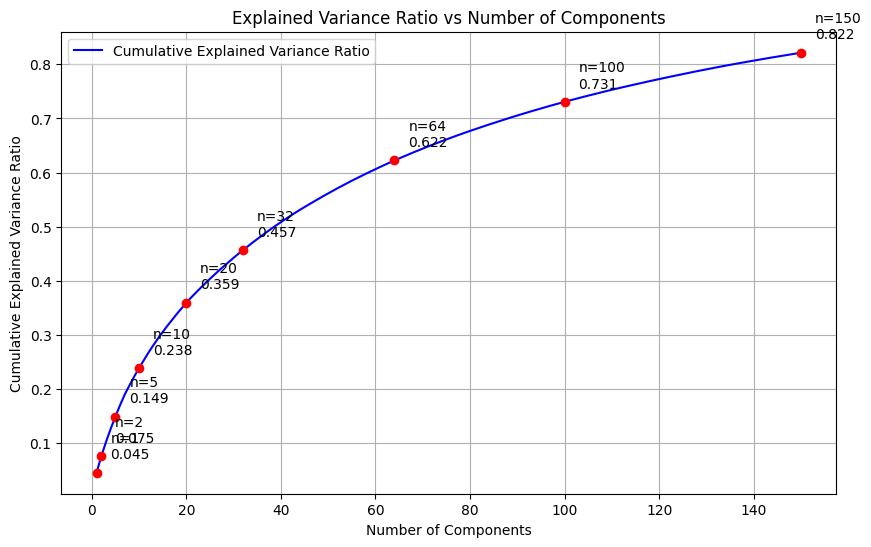


Variance ratio retained with different number of components:
n_components = 1: 4.51%
n_components = 2: 7.51%
n_components = 5: 14.88%
n_components = 10: 23.85%
n_components = 20: 35.94%
n_components = 32: 45.67%
n_components = 64: 62.23%
n_components = 100: 73.08%
n_components = 150: 82.15%


In [5]:
from pca import PCA
import matplotlib.pyplot as plt

X_train_norm = X_train / 255.0

n_components_max = 150
pca = PCA(n_components=n_components_max)
pca.fit(X_train_norm)

cum_var_ratio = pca.information_percent()

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components_max + 1), cum_var_ratio, 'b-', label='Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.legend()



for n in [1, 2, 5, 10, 20, 32, 64, 100, 150]:
    plt.plot(n, cum_var_ratio[n-1], 'ro')
    plt.annotate(f'n={n}\n{cum_var_ratio[n-1]:.3f}', 
                xy=(n, cum_var_ratio[n-1]), 
                xytext=(10, 10),
                textcoords='offset points')

plt.show()


print("\nVariance ratio retained with different number of components:")
for n in [1, 2, 5, 10, 20, 32, 64, 100, 150]: 
    print(f"n_components = {n}: {cum_var_ratio[n-1]*100:.2f}%")

## 3. Principal components analysis with 16 components

In [6]:
from pca import PCA

n_component = 150
pca = PCA(n_components=n_component)
pca.fit(X_train)
pca_train = pca.transform(X_train)

In [7]:
col_names_train = dict()
for i in range(n_component):
    col_names_train["PCs " + str(i + 1)] = pca_train[:, i]

df_train_pca = pd.DataFrame(col_names_train)
df_train_pca[:10]

,PCs 1,PCs 2,PCs 3,PCs 4,PCs 5,PCs 6,PCs 7,PCs 8,PCs 9,PCs 10,...,PCs 141,PCs 142,PCs 143,PCs 144,PCs 145,PCs 146,PCs 147,PCs 148,PCs 149,PCs 150
0,-213.686245,-539.618154,-1342.691515,-604.815085,802.194707,264.096241,675.601954,288.959638,762.674341,-374.419880,...,-157.142023,-85.753251,150.259657,200.588051,147.543823,-49.076738,63.138754,87.359235,77.260383,15.341124
1,-996.122355,-241.951931,-883.124733,-174.539874,-408.845421,-427.542245,-530.645032,504.119141,-23.963268,-331.560631,...,-33.201366,18.771687,74.002672,41.417200,-77.916690,64.938804,-129.167154,54.546994,72.639958,-97.853413
2,-1365.634615,-259.372711,-1363.776257,293.322703,595.726667,-75.838622,-310.878419,298.048462,96.789576,-157.712617,...,31.206312,86.020046,-79.200794,21.085566,-65.748515,177.163895,-240.053958,-12.955915,-56.097980,1.535895
3,-743.527421,-440.527733,-1120.006120,-130.613207,-372.367559,191.999116,-430.135428,584.015108,-37.537603,164.748661,...,196.328277,131.330577,-74.886936,35.611190,121.633512,20.966036,9.442854,13.537644,21.042922,-157.342844
4,-1408.219272,-260.156947,-346.049344,-516.488376,-508.191741,-349.565312,18.892732,321.245524,-366.318970,647.823517,...,-57.585195,184.328543,-134.539320,54.921512,-49.564970,227.029609,-154.751229,67.684161,68.041772,141.188566
5,193.503717,-603.464575,-1132.410126,-273.507501,870.881083,173.167145,5.533311,-42.503686,-9.606078,-56.328817,...,-30.382043,-84.947941,-43.315266,-5.785120,-24.880489,85.686694,111.409216,462.106232,-32.762923,-60.302332
6,-196.602750,359.056530,307.535298,-556.254368,339.062098,890.036066,194.768933,221.464068,-157.046696,401.550705,...,-20.197158,134.123358,-105.234173,50.402018,19.700415,121.920121,23.311462,38.563404,-237.406874,85.752860
7,-745.501208,81.899535,389.819077,-82.268301,414.713131,1085.533909,384.950397,147.112923,-262.089002,719.051346,...,-23.986306,16.862692,-153.464591,125.463840,40.292850,21.663312,-100.230321,1.211829,-278.588630,176.135349
8,-933.982366,-310.817132,-448.957575,-112.422152,310.760044,-194.783242,-418.511495,260.106759,-205.226115,-509.656989,...,4.506007,213.172482,-127.328786,192.580218,-220.076410,-293.492667,-54.834883,113.836645,141.707474,-112.757885
9,36.770303,-689.366473,-765.564624,-233.893358,-670.261150,231.453267,40.452052,399.037449,-736.751029,203.234481,...,-42.000968,-88.682439,-75.436992,-140.686153,-85.513212,58.319491,-89.217239,154.879151,117.669931,132.509577


[0.04505471 0.07507414 0.10175506 0.12626188 0.1488052  0.17034709
 0.19023556 0.20696532 0.22323173 0.23848763 0.25291744 0.26727085
 0.28045429 0.2931653  0.30517446 0.31679351 0.327894   0.338724
 0.3492314  0.35942409 0.36886883 0.37784866 0.38663961 0.39521011
 0.40361944 0.41176984 0.41973567 0.42734983 0.43491895 0.4424085
 0.44972437 0.45667779 0.46360894 0.47048614 0.47713784 0.48361957
 0.49005748 0.49633028 0.50245114 0.50833658 0.51419925 0.51997235
 0.52552064 0.53097598 0.53626858 0.54143488 0.54655967 0.55163879
 0.5565981  0.56151431 0.56637603 0.57113634 0.5757943  0.58039341
 0.58492436 0.58930531 0.59362608 0.59792807 0.60215848 0.60630776
 0.61040003 0.61447177 0.61840771 0.6222966  0.62610214 0.62984708
 0.63355878 0.63719298 0.64078568 0.64432674 0.64777974 0.65119966
 0.65459145 0.65790553 0.66119694 0.66447888 0.66769136 0.6708239
 0.67391338 0.67695602 0.67994618 0.68291554 0.68583798 0.68874886
 0.69160339 0.69445426 0.69727455 0.70006249 0.70280986 0.70550756

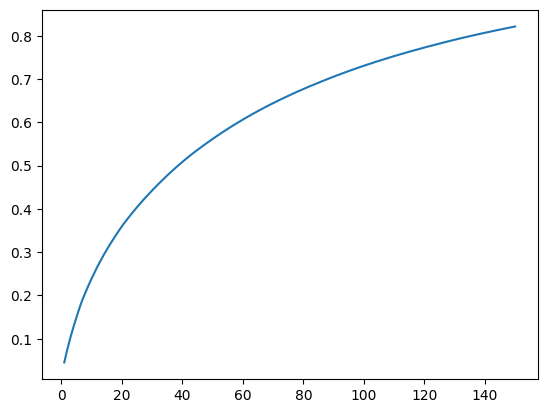

In [8]:
import numpy as np

x = np.arange(1, n_component+1)
y = pca.information_percent()
print(y)
plt.plot(x, y)
plt.show()

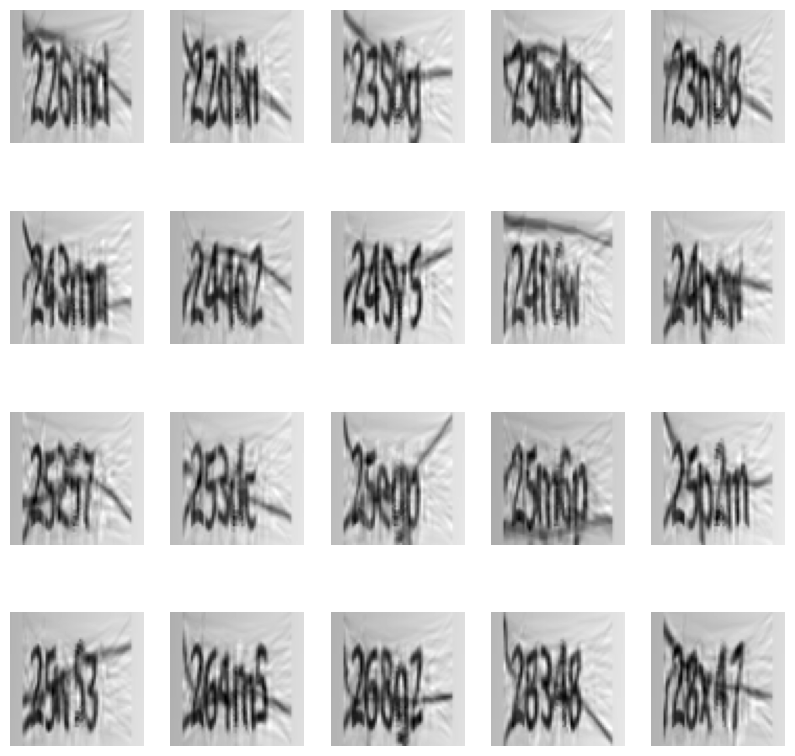

In [9]:
project_data = pca.project_data(X_train)
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1) 
    plt.imshow(project_data[i].reshape(64,64),cmap='gray')
    plt.axis("off")
plt.show()